# Importing required libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Load the cleaned dataset


In [2]:
df = pd.read_csv('../data/cleaned_xente_data.csv')

In [3]:
## Overview of the Data
print("Data Shape:", df.shape)
print("Data Types:\n", df.dtypes)



Data Shape: (95662, 16)
Data Types:
 TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


# Summary Statistics


In [4]:
print("Summary Statistics:\n", df.describe())

Summary Statistics:
        CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


# Distribution of Numerical Features


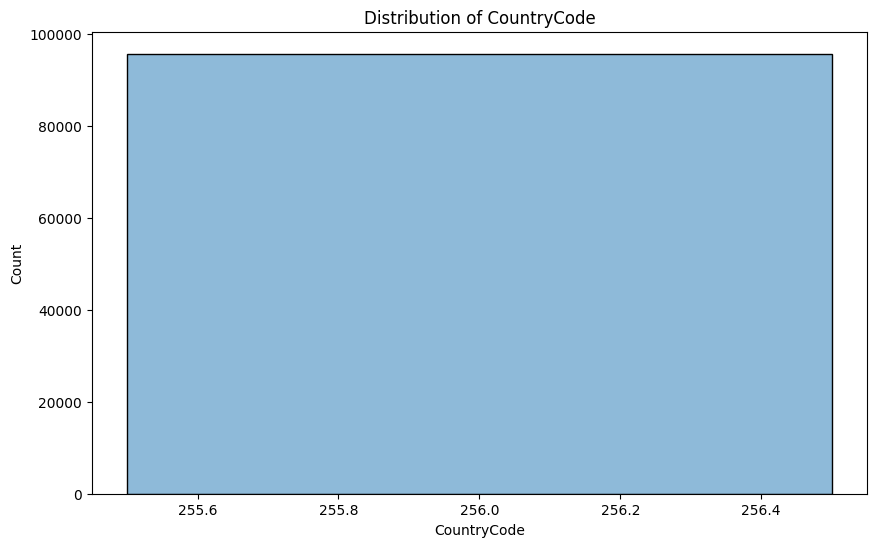

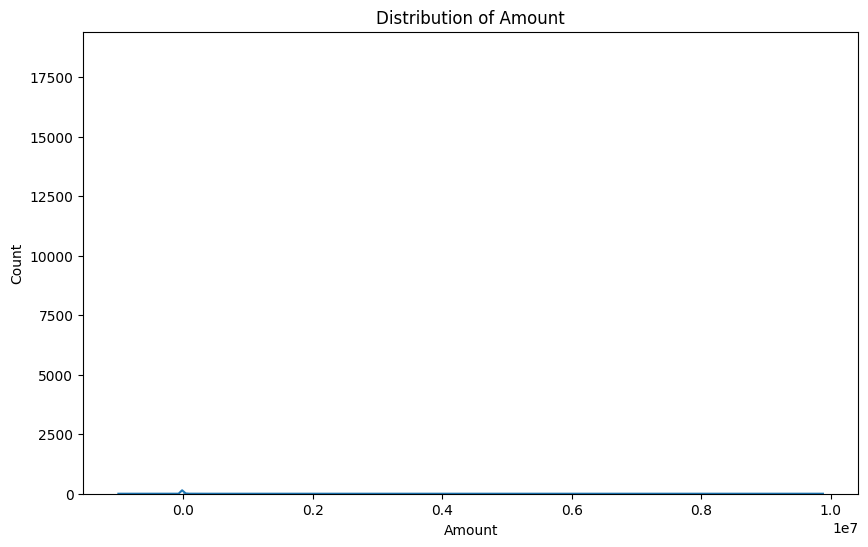

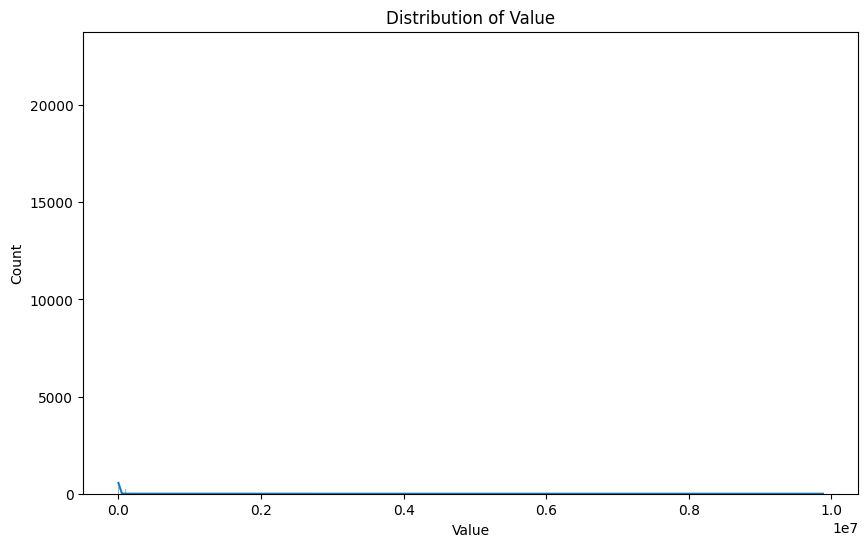

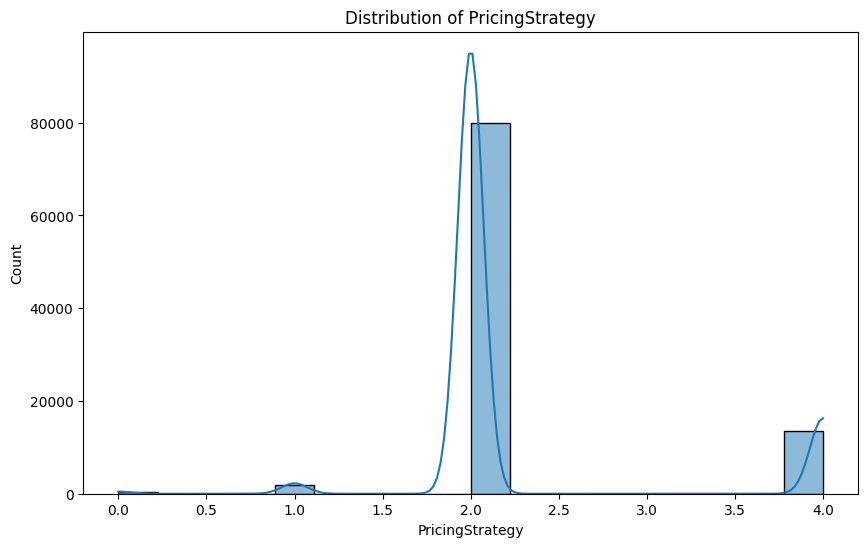

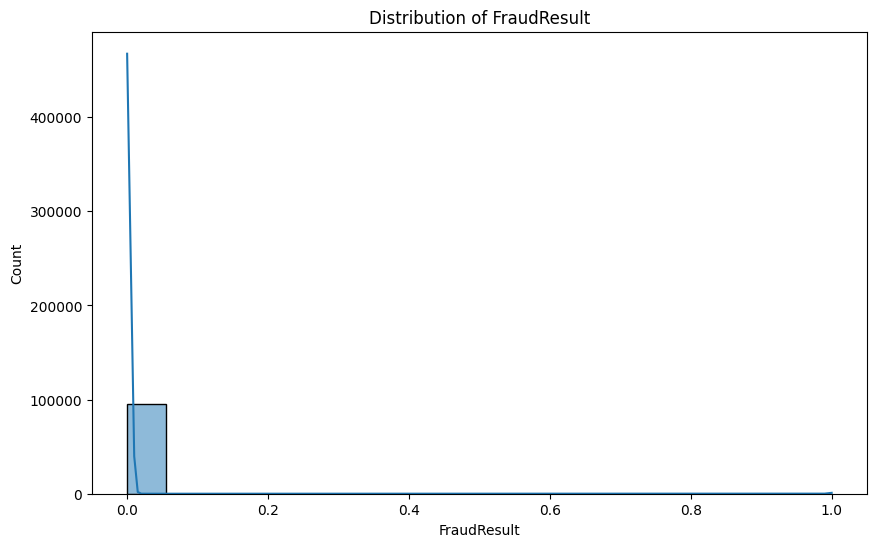

In [5]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
for feature in numerical_features:
    plt.figure(figsize=(10,6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Distribution of Categorical Features



Top 10 most frequent categories for TransactionId:
 TransactionId
TransactionId_35670     1
TransactionId_76871     1
TransactionId_73770     1
TransactionId_26203     1
TransactionId_380       1
TransactionId_28195     1
TransactionId_23223     1
TransactionId_118063    1
TransactionId_100640    1
TransactionId_51905     1
Name: count, dtype: int64


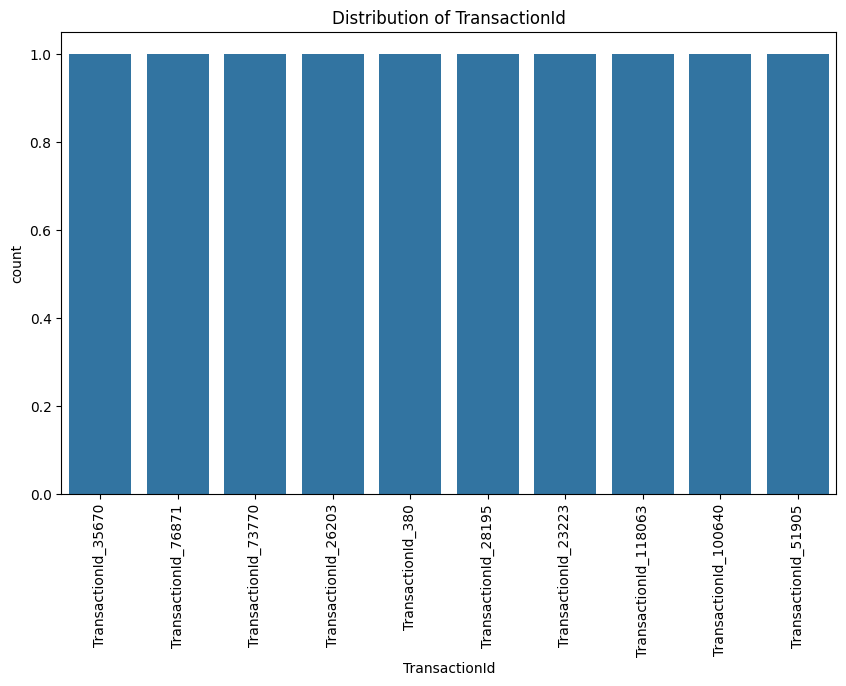


Top 10 most frequent categories for BatchId:
 BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
BatchId_88001      9
BatchId_49408      7
BatchId_110084     7
BatchId_86880      6
BatchId_22960      6
Name: count, dtype: int64


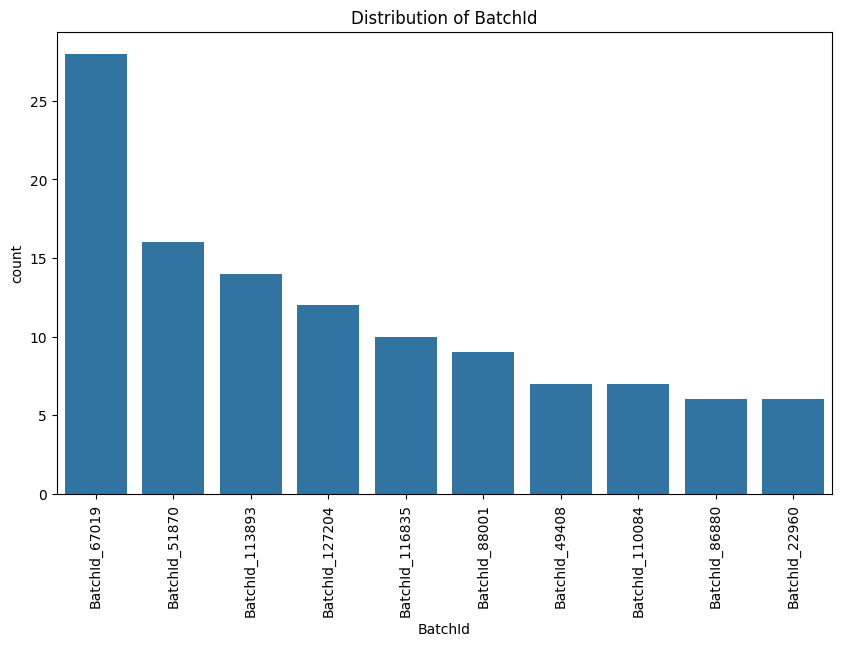


Top 10 most frequent categories for AccountId:
 AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
AccountId_10        965
AccountId_3595      465
AccountId_751       411
AccountId_2648      359
AccountId_2314      356
Name: count, dtype: int64


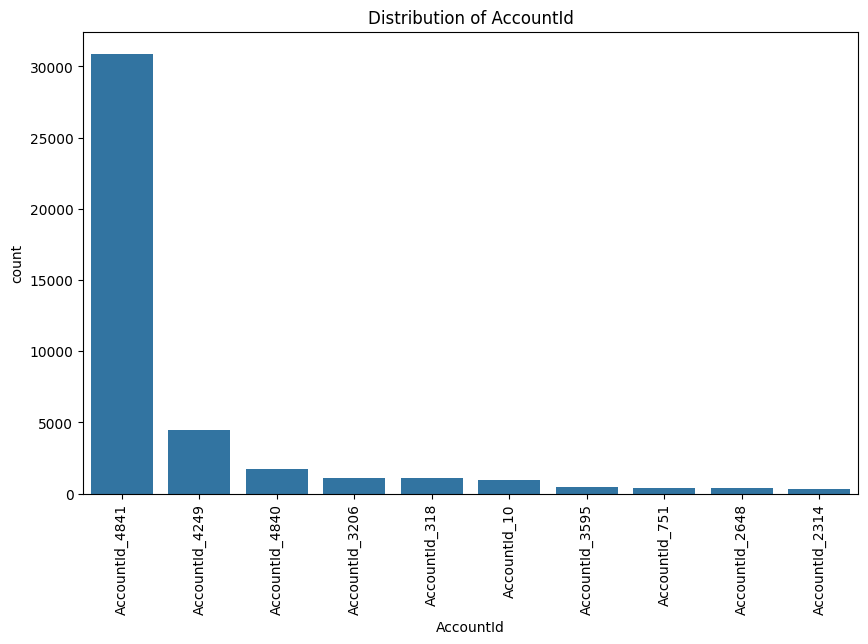


Top 10 most frequent categories for SubscriptionId:
 SubscriptionId
SubscriptionId_3829    32630
SubscriptionId_4429     4457
SubscriptionId_1372     1105
SubscriptionId_3087     1070
SubscriptionId_4346      965
SubscriptionId_1749      465
SubscriptionId_919       411
SubscriptionId_1311      359
SubscriptionId_4722      356
SubscriptionId_652       350
Name: count, dtype: int64


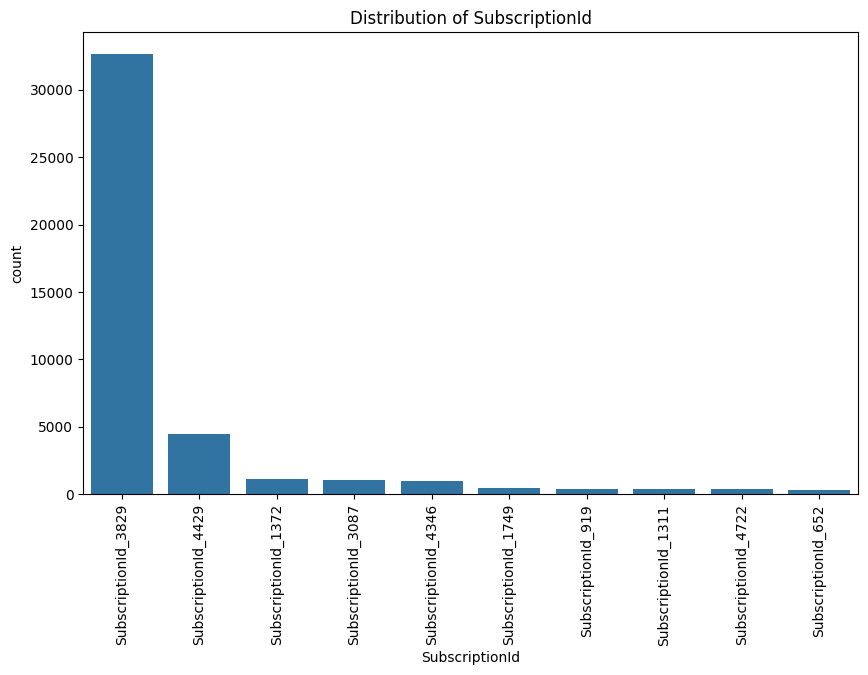


Top 10 most frequent categories for CustomerId:
 CustomerId
CustomerId_7343    4091
CustomerId_3634    2085
CustomerId_647     1869
CustomerId_1096     784
CustomerId_4033     778
CustomerId_3066     612
CustomerId_2528     610
CustomerId_2728     586
CustomerId_3078     573
CustomerId_806      557
Name: count, dtype: int64


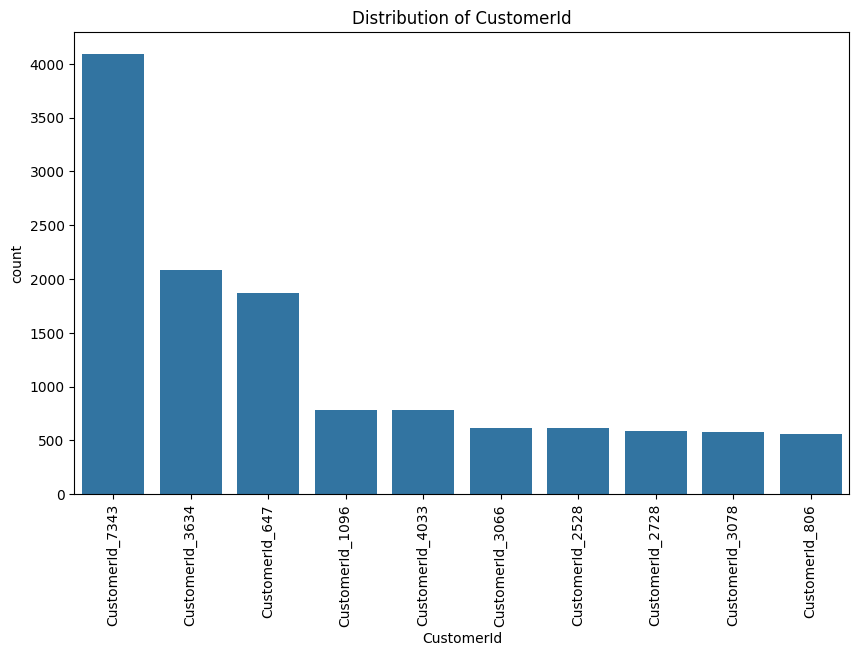


Top 10 most frequent categories for CurrencyCode:
 CurrencyCode
UGX    95662
Name: count, dtype: int64


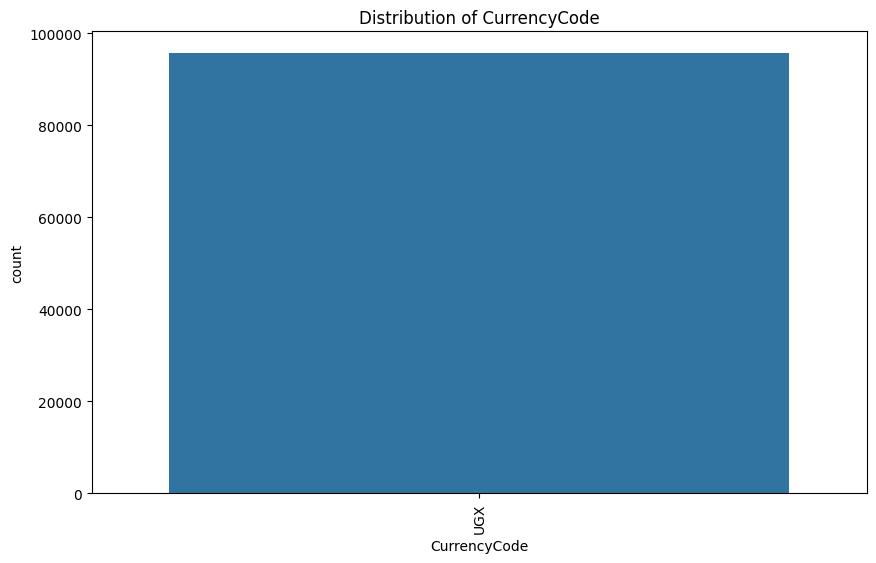


Top 10 most frequent categories for ProviderId:
 ProviderId
ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
ProviderId_2       18
Name: count, dtype: int64


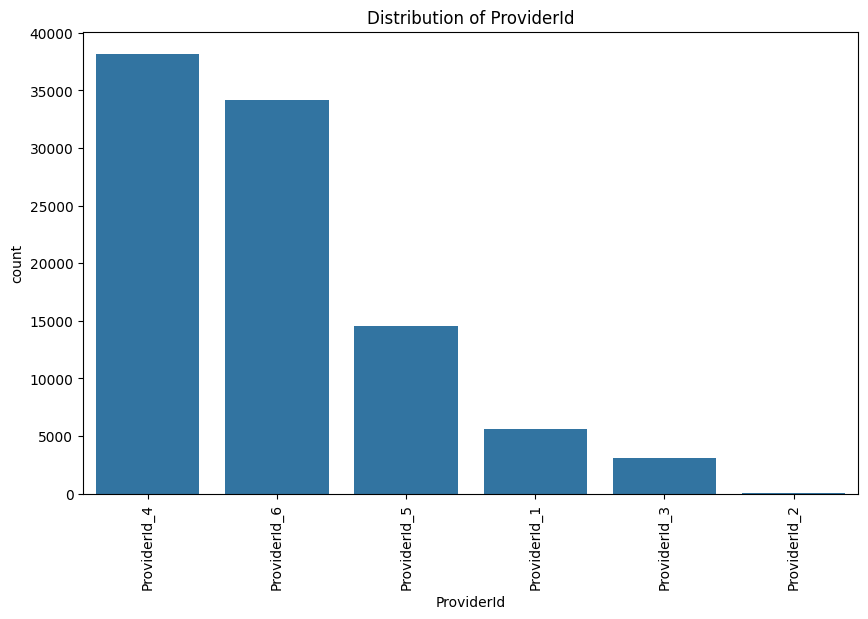


Top 10 most frequent categories for ProductId:
 ProductId
ProductId_6     32635
ProductId_3     24344
ProductId_10    15384
ProductId_15    11964
ProductId_1      2885
ProductId_4      2403
ProductId_21     1512
ProductId_11     1377
ProductId_19      965
ProductId_14      789
Name: count, dtype: int64


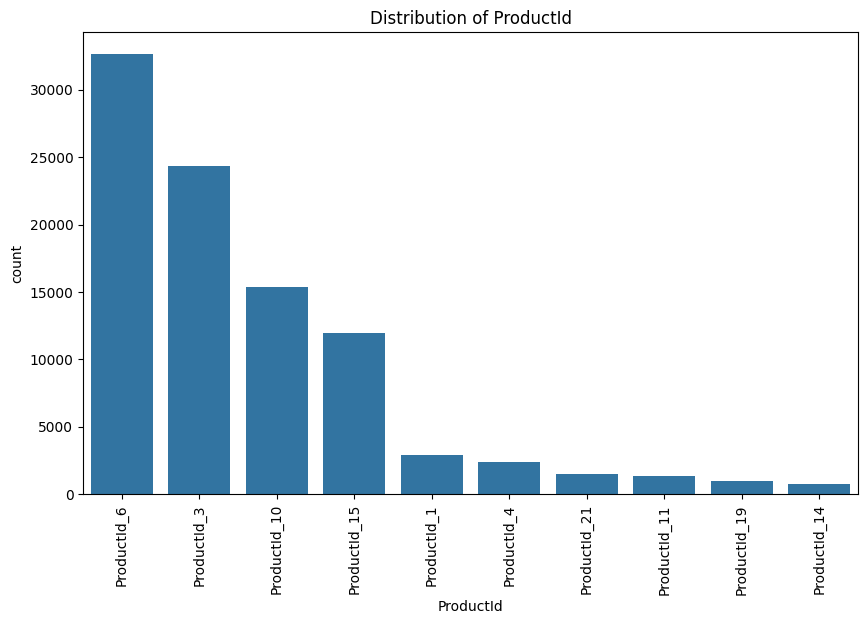


Top 10 most frequent categories for ProductCategory:
 ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64


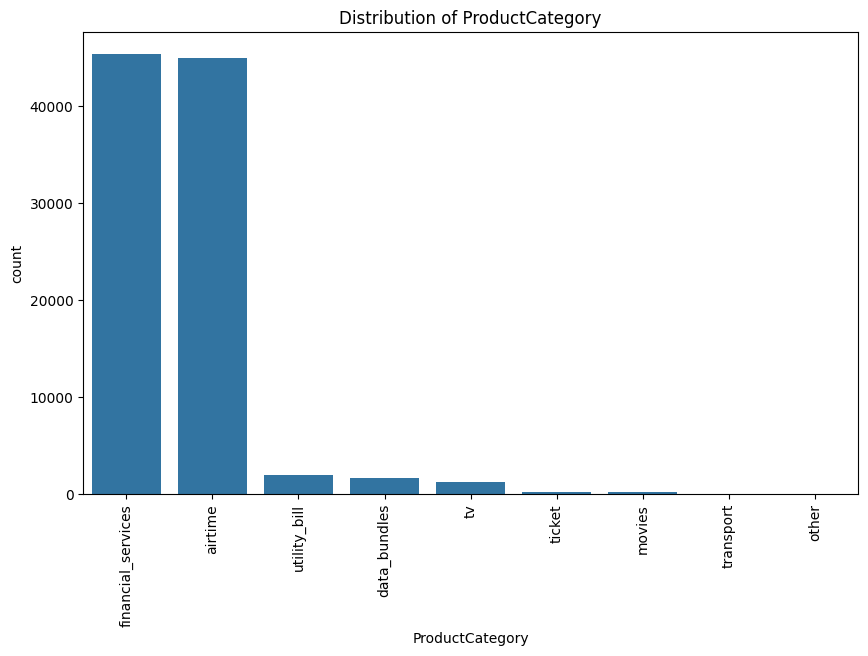


Top 10 most frequent categories for ChannelId:
 ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64


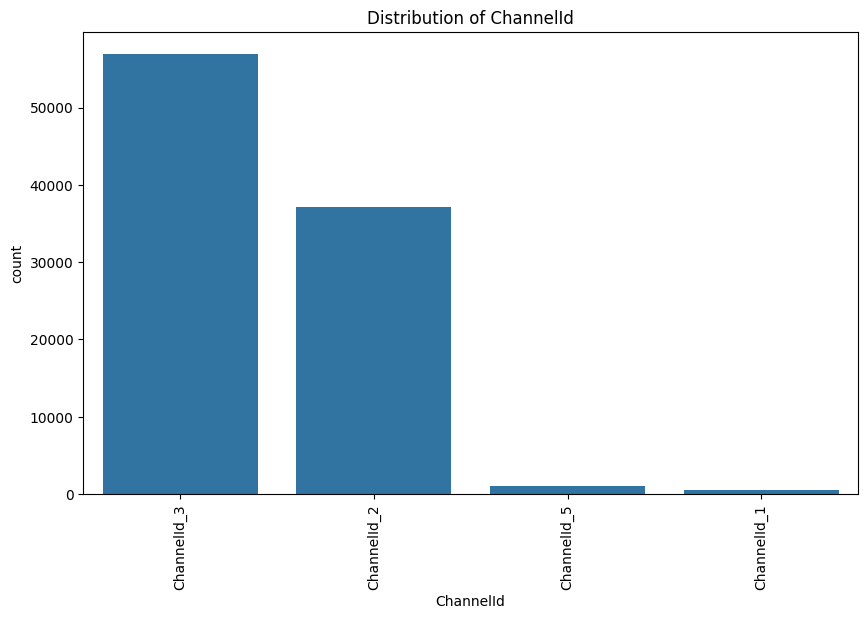


Top 10 most frequent categories for TransactionStartTime:
 TransactionStartTime
2018-12-24T16:30:13Z    17
2018-11-15T07:03:26Z     9
2018-12-07T13:09:44Z     6
2018-12-24T16:30:12Z     6
2018-11-15T07:03:27Z     5
2018-12-07T13:09:47Z     4
2018-12-24T16:30:11Z     4
2018-12-07T11:54:01Z     4
2019-01-04T04:29:41Z     4
2019-01-14T17:24:54Z     4
Name: count, dtype: int64


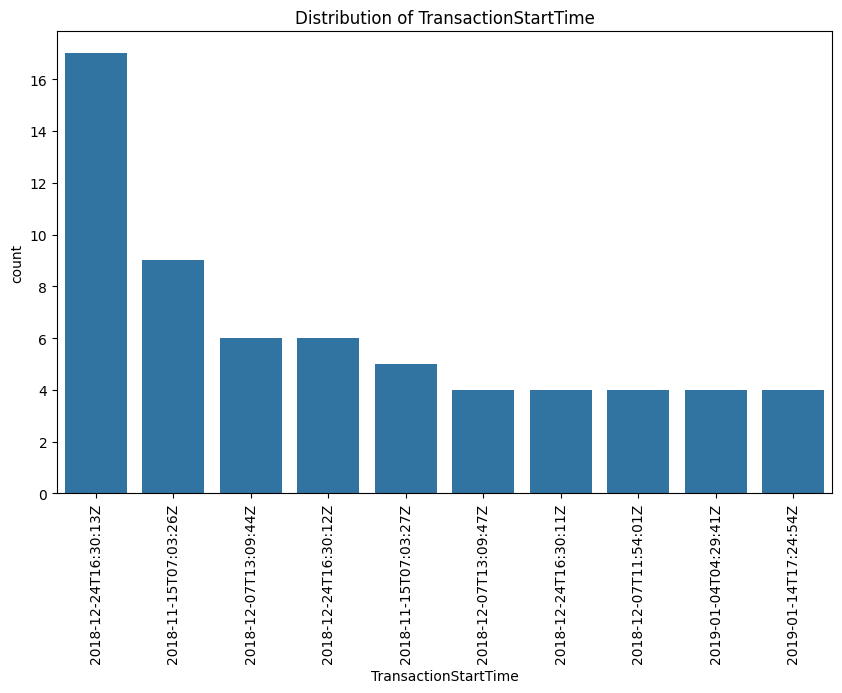

In [13]:
categorical_features = df.select_dtypes(include=[object]).columns.tolist()

for feature in categorical_features:
    # Display top 10 most frequent categories
    top_10 = df[feature].value_counts().head(10)
    print(f"\nTop 10 most frequent categories for {feature}:\n", top_10)

    # Plot distribution
    plt.figure(figsize=(10,6))
    sns.countplot(x=feature, data=df, order=top_10.index)  # Only plot top 10 categories
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)
    plt.show()

 # Correlation Analysis


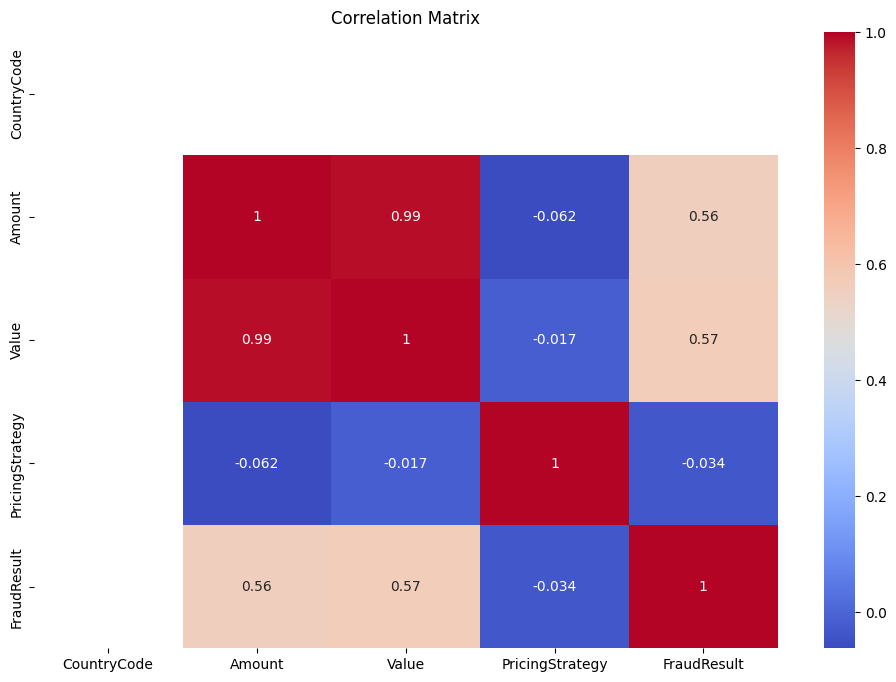

In [9]:
numerical_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix only for numerical columns
corr_matrix = numerical_df.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#   Identifying Missing Values


In [10]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


#   Outlier Detection using Box Plots


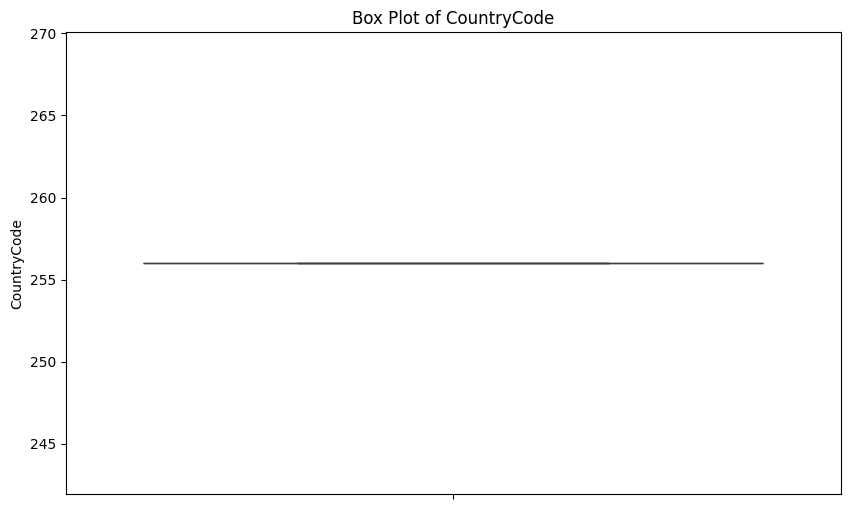

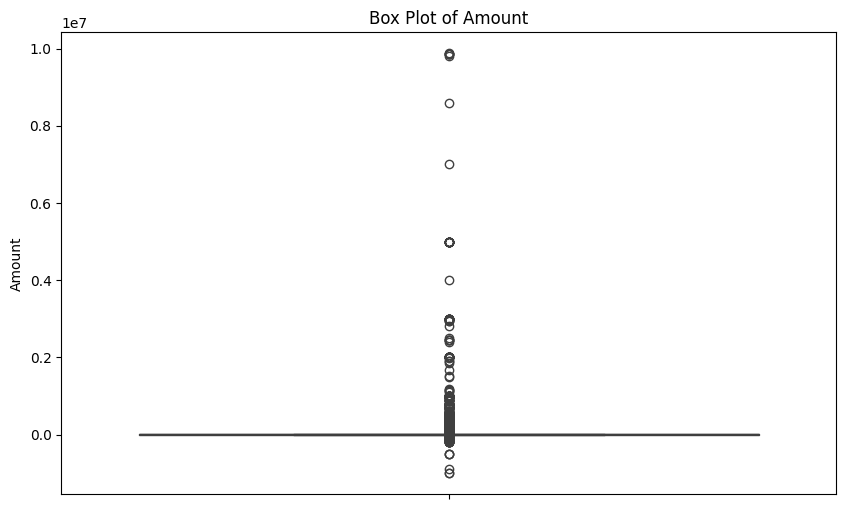

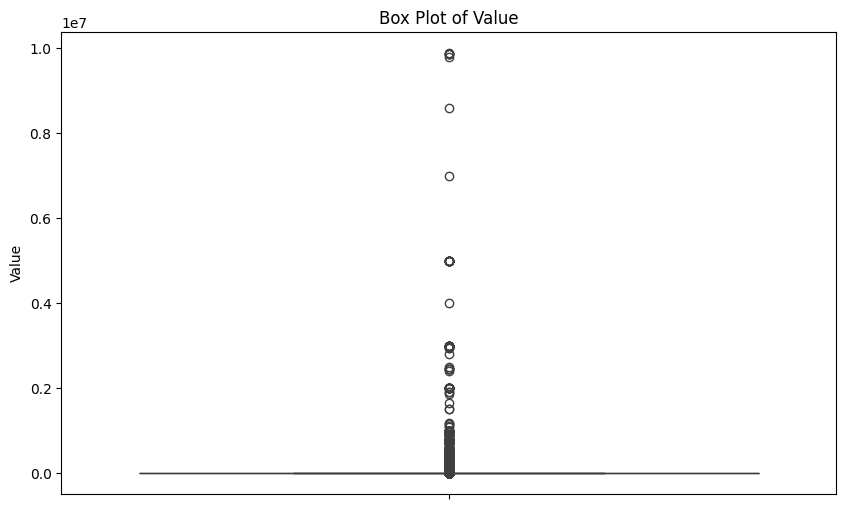

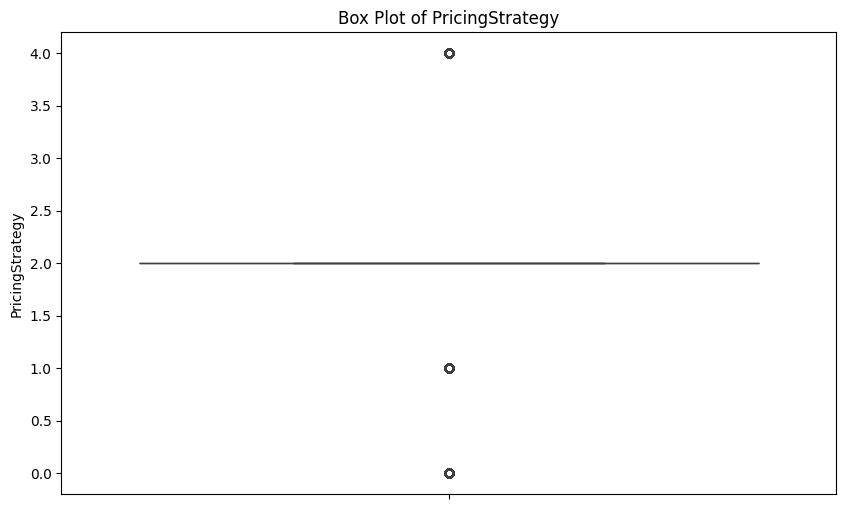

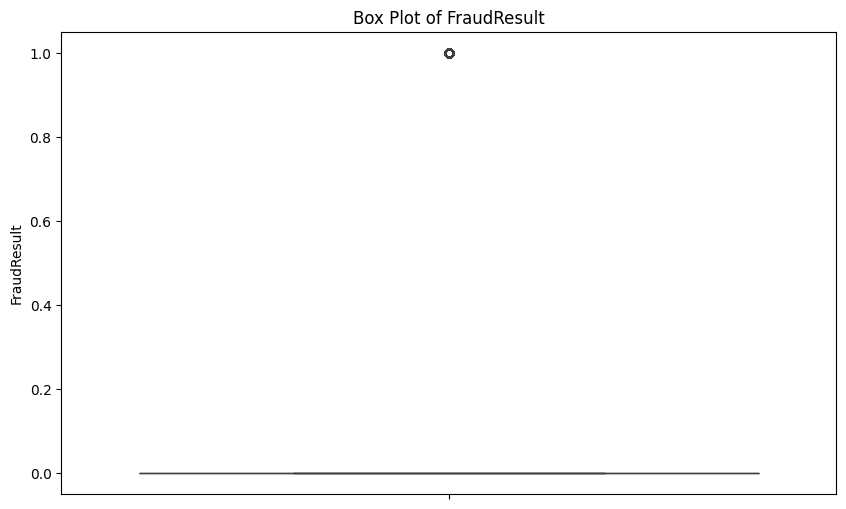

EDA Completed.


In [11]:
for feature in numerical_features:
    plt.figure(figsize=(10,6))
    sns.boxplot(df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()
print("EDA Completed.")